In [1]:
from tqdm import tqdm
import numpy as np
from matplotlib import pyplot as plt
import torch
from datasets.ascad_datasets import AscadDataset
from datasets.purdue_power_traces import PurdueDataset
from datasets.google_power_traces import GoogleDataset

In [2]:
ascad_dataset_train = AscadDataset(train=True, whiten_traces=False, subtract_mean_trace=False)
ascad_dataset_test = AscadDataset(train=False, whiten_traces=False, subtract_mean_trace=False)
purdue_dataset_train = PurdueDataset(train=True, whiten_traces=False, subtract_mean_trace=False)
purdue_dataset_test = PurdueDataset(train=False, whiten_traces=False, subtract_mean_trace=False)
google_dataset_train = GoogleDataset(train=True, whiten_traces=False, subtract_mean_trace=False)
google_dataset_test = GoogleDataset(train=False, whiten_traces=False, subtract_mean_trace=False)

ASCAD training dataset:
Number of traces: 50000


50000it [00:00, 61650.03it/s]


Variance of mean trace: 656.912467


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50000/50000 [00:02<00:00, 21495.46it/s]


Mean variance of residuals: 6.193120
SNR: 0.009428


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50000/50000 [00:02<00:00, 23386.63it/s]


Trace sample range: -66.000000 -- 47.000000
# distinct sample values: 114
Label range: 0 -- 255
# distinct label values: 256


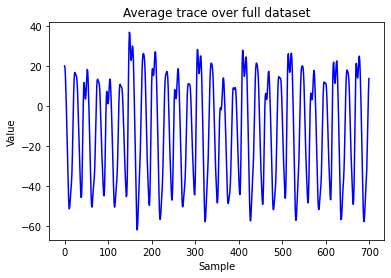

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50000/50000 [00:00<00:00, 108628.98it/s]


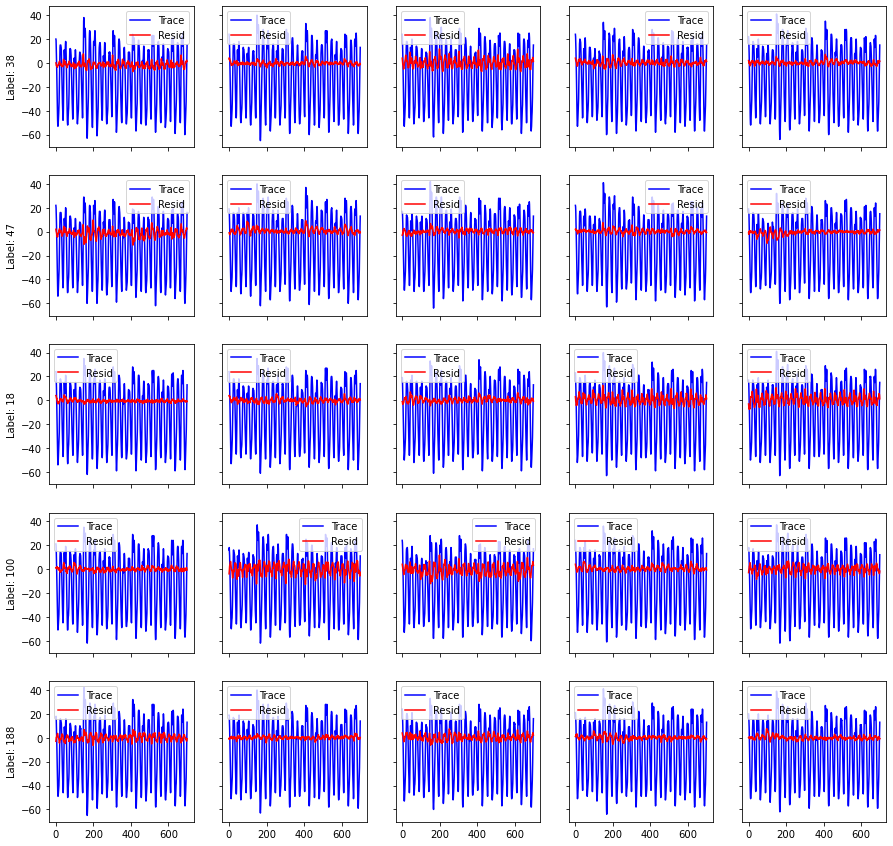

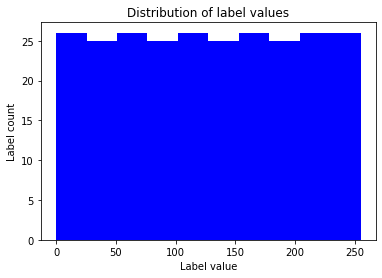





ASCAD testing dataset:
Number of traces: 10000


10000it [00:00, 61311.72it/s]


Variance of mean trace: 657.064183


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 21618.69it/s]


Mean variance of residuals: 6.232870
SNR: 0.009486


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 20572.63it/s]


Trace sample range: -67.000000 -- 46.000000
# distinct sample values: 114
Label range: 0 -- 255
# distinct label values: 256


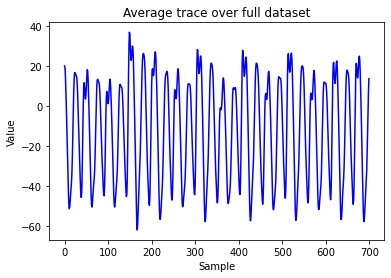

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 107311.55it/s]


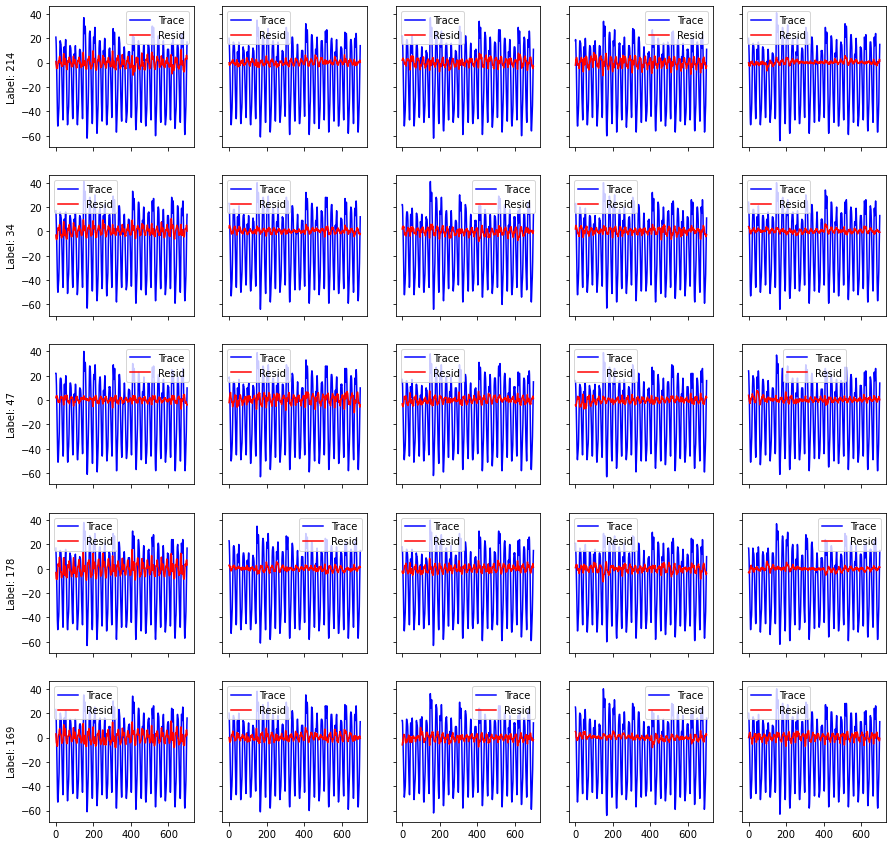

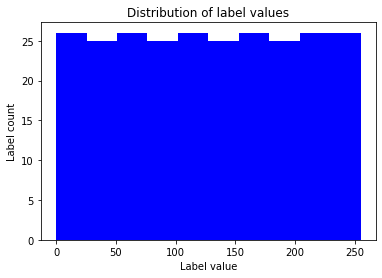





Purdue training dataset:
Number of traces: 40000


40000it [00:00, 56715.21it/s]


Variance of mean trace: 0.006273


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40000/40000 [00:01<00:00, 22283.74it/s]


Mean variance of residuals: 0.000048
SNR: 0.007603


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40000/40000 [00:01<00:00, 24160.50it/s]


Trace sample range: -0.354492 -- 0.122070
# distinct sample values: 489
Label range: 0 -- 255
# distinct label values: 256


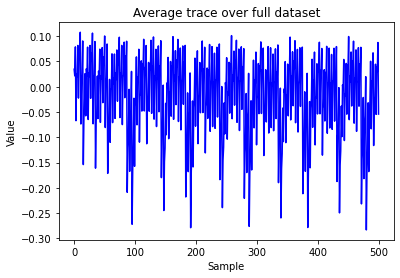

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40000/40000 [00:00<00:00, 82514.69it/s]


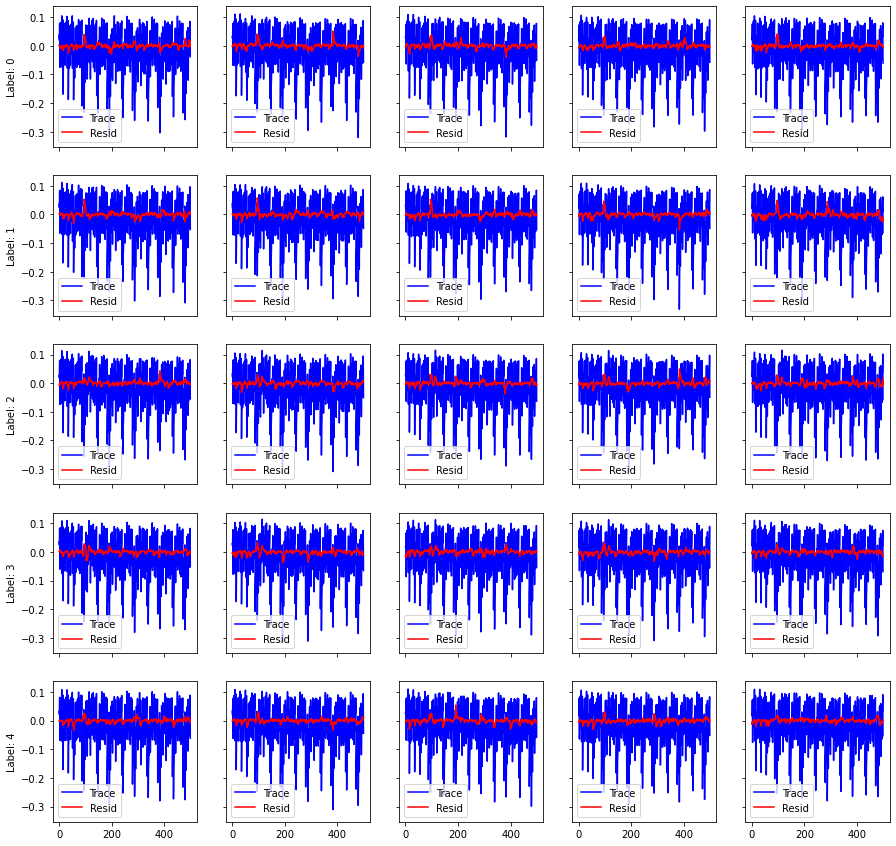

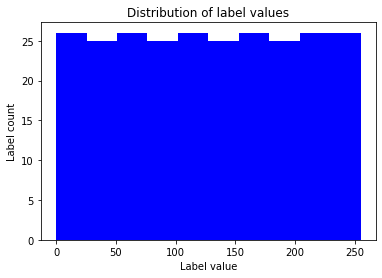





Purdue testing dataset:
Number of traces: 110000


110000it [00:01, 57070.47it/s]


Variance of mean trace: 0.005939


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110000/110000 [00:05<00:00, 21909.06it/s]


Mean variance of residuals: 0.000097
SNR: 0.016285


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110000/110000 [00:04<00:00, 23873.67it/s]


Trace sample range: -0.349609 -- 0.221680
# distinct sample values: 575
Label range: 0 -- 255
# distinct label values: 256


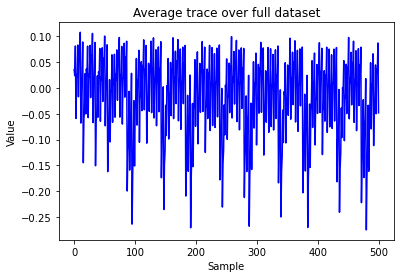

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110000/110000 [00:01<00:00, 84063.88it/s]


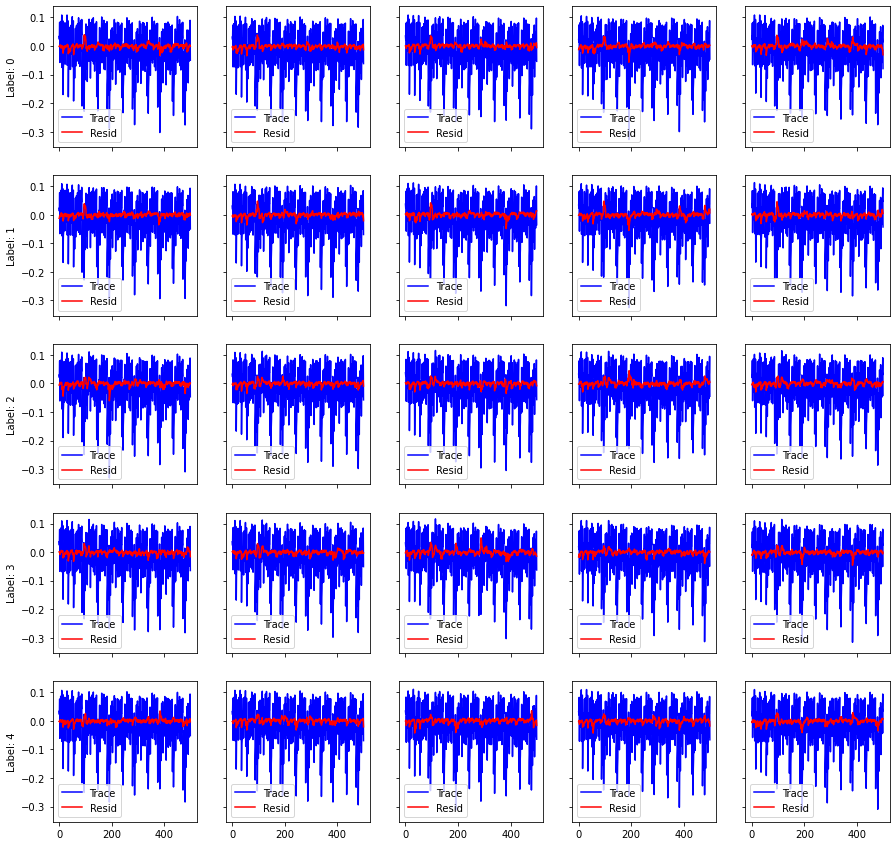

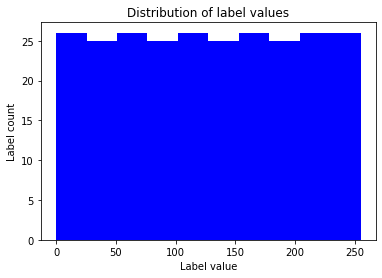





Google training dataset:
Number of traces: 65536


65536it [00:01, 41222.42it/s]


Variance of mean trace: 0.013330


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 65536/65536 [00:03<00:00, 17207.20it/s]


Mean variance of residuals: 0.005094
SNR: 0.382155


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 65536/65536 [00:11<00:00, 5865.28it/s]


Trace sample range: -0.664551 -- 0.985352
# distinct sample values: 115
Label range: 0 -- 255
# distinct label values: 256


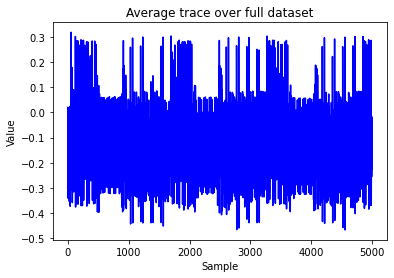

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 65536/65536 [00:00<00:00, 99213.23it/s]


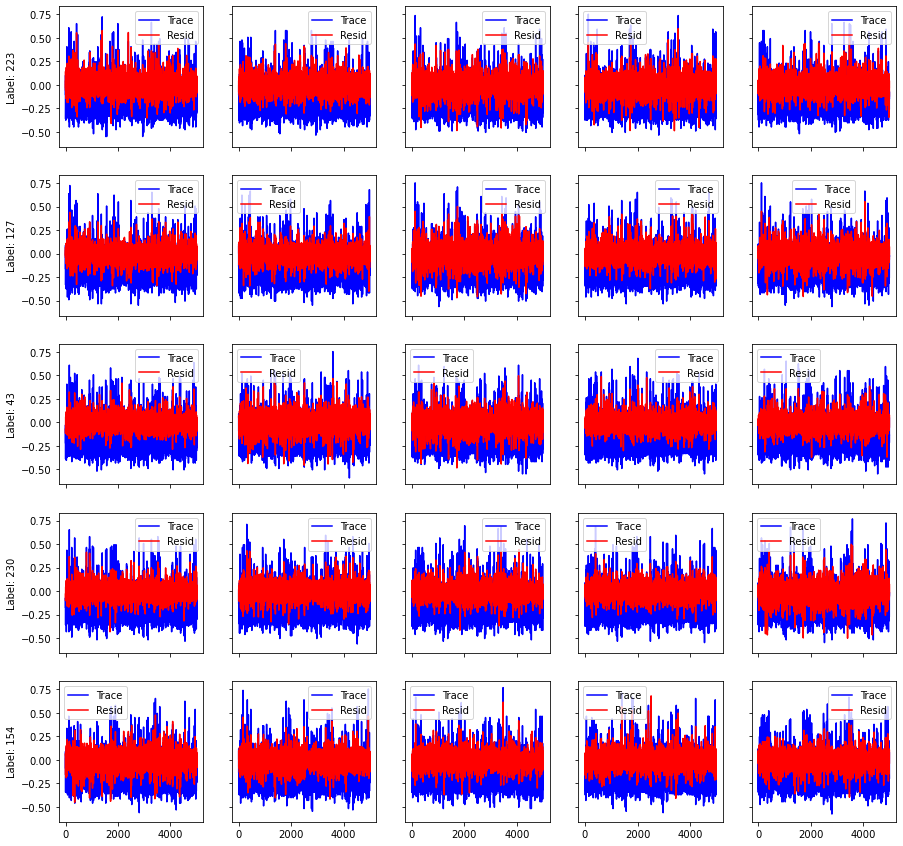

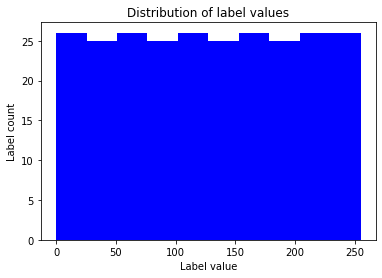





Google testing dataset:
Number of traces: 65536


65536it [00:01, 40906.89it/s]


Variance of mean trace: 0.013339


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 65536/65536 [00:03<00:00, 17239.11it/s]


Mean variance of residuals: 0.005089
SNR: 0.381519


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 65536/65536 [00:11<00:00, 5867.11it/s]


Trace sample range: -0.664551 -- 0.970703
# distinct sample values: 114
Label range: 0 -- 255
# distinct label values: 256


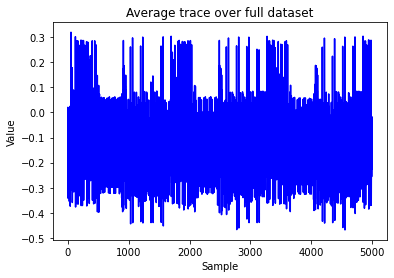

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 65536/65536 [00:00<00:00, 97053.05it/s]


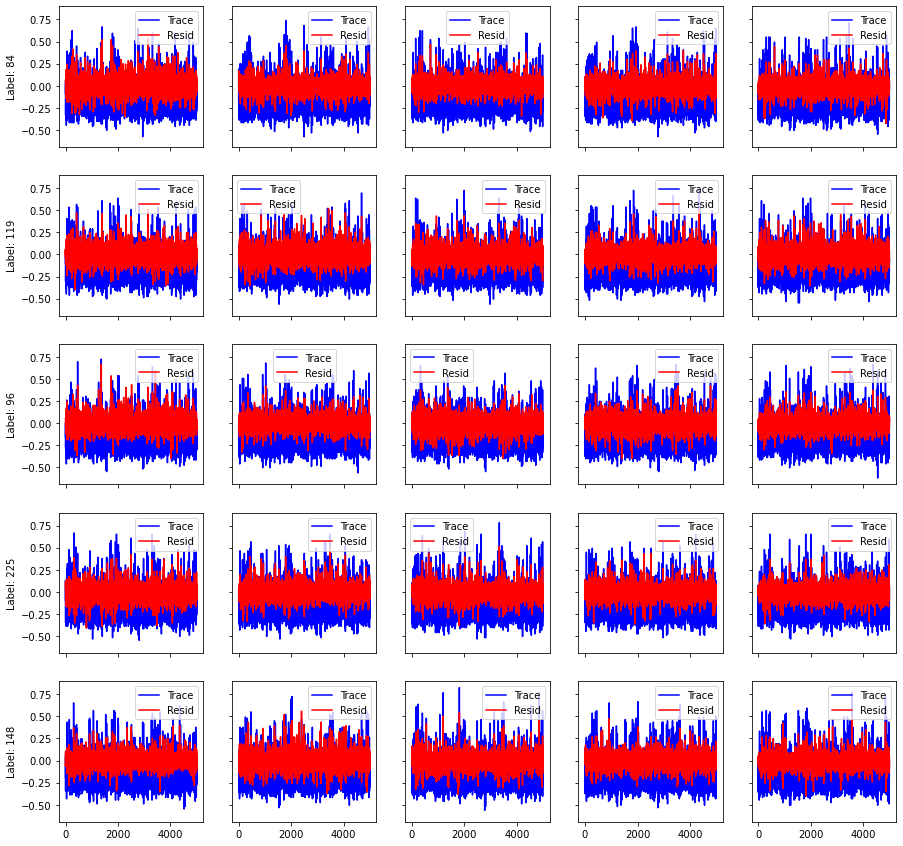

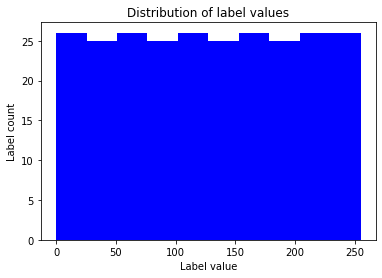

In [3]:
def analyze_dataset(dataset):
    print('Number of traces: %d'%(len(dataset)))
    eg_trace, _ = dataset[0]
    mean_trace = np.zeros(eg_trace.shape)
    for idx, (trace, _) in tqdm(enumerate(dataset)):
        trace = trace.numpy()
        mean_trace = (idx/(idx+1))*mean_trace + (1/(idx+1))*trace
    mean_trace_var = np.std(mean_trace)**2
    print('Variance of mean trace: %f'%(mean_trace_var))
    residual_vars = []
    for trace, _ in tqdm(dataset):
        trace = trace.numpy().flatten()
        residual_var = np.std(trace-mean_trace)**2
        residual_vars.append(residual_var)
    mean_residual_var = np.mean(residual_vars)
    print('Mean variance of residuals: %f'%(mean_residual_var))
    print('SNR: %f'%(mean_residual_var/mean_trace_var))
    trace_vals = []
    label_vals = []
    for trace, label in tqdm(dataset):
        trace = trace.numpy()
        label = label.numpy()
        trace_vals.append(np.unique(trace))
        label_vals.append(label)
    trace_vals = np.unique(np.concatenate(trace_vals))
    label_vals, label_counts = np.unique(np.array(label_vals), return_counts=True)
    print('Trace sample range: %f -- %f'%(np.min(trace_vals), np.max(trace_vals)))
    print('# distinct sample values: %d'%(len(trace_vals)))
    print('Label range: %d -- %d'%(np.min(label_vals), np.max(label_vals)))
    print('# distinct label values: %d'%(len(label_vals)))
    
    fig, ax = plt.subplots()
    ax.plot(mean_trace.flatten(), '-', color='blue')
    ax.set_xlabel('Sample')
    ax.set_ylabel('Value')
    ax.set_title('Average trace over full dataset')
    plt.show()
    
    num_labels_to_plot = 5
    plots_per_label = 5
    distinct_labels = dict()
    for trace, label in tqdm(dataset):
        label = int(label.numpy())
        if not(label in distinct_labels.keys()):
            if len(distinct_labels.keys()) >= num_labels_to_plot:
                continue
            else:
                distinct_labels[label] = []
                trace = trace.numpy().flatten()
                distinct_labels[label].append(trace)
        else:
            if len(distinct_labels[label]) >= plots_per_label:
                continue
            else:
                trace = trace.numpy().flatten()
                distinct_labels[label].append(trace)
    fig, axes = plt.subplots(num_labels_to_plot, plots_per_label, figsize=(3*plots_per_label, 3*num_labels_to_plot),
                             sharex=True, sharey=True)
    for ridx, label in enumerate(distinct_labels.keys()):
        for cidx in range(len(distinct_labels[label])):
            axes[ridx, cidx].plot(distinct_labels[label][cidx], color='blue', label='Trace')
            axes[ridx, cidx].plot(distinct_labels[label][cidx]-mean_trace.flatten(), color='red', label='Resid')
            axes[ridx, cidx].legend()
    for ax, label in zip(axes[:, 0], distinct_labels.keys()):
        ax.set_ylabel('Label: {}'.format(label))
    plt.show()
        
    fig, ax = plt.subplots()
    ax.hist(label_vals, color='blue')
    ax.set_xlabel('Label value')
    ax.set_ylabel('Label count')
    ax.set_title('Distribution of label values')
    plt.show()


print('ASCAD training dataset:')
analyze_dataset(ascad_dataset_train)
print('\n\n\n')
print('ASCAD testing dataset:')
analyze_dataset(ascad_dataset_test)
print('\n\n\n')
print('Purdue training dataset:')
analyze_dataset(purdue_dataset_train)
print('\n\n\n')
print('Purdue testing dataset:')
analyze_dataset(purdue_dataset_test)
print('\n\n\n')
print('Google training dataset:')
analyze_dataset(google_dataset_train)
print('\n\n\n')
print('Google testing dataset:')
analyze_dataset(google_dataset_test)